### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratings = pd.read_csv('Data.csv')
movies = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
print('ratings:\n')
ratings.info()
ratings.describe()
ratings.shape


ratings:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(100000, 4)

In [4]:
print('movies:\n')
movies.info()
movies.describe()
movies.shape

movies:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 1

(1681, 22)

In [5]:
print('users:\n')
users.info()
users.describe()
users.shape

users:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(943, 5)

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [6]:
movies.aggregate(sum, axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
movies.loc[movies['unknown']==1]
movies = movies[movies.unknown!=1]

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [8]:
genres = movies.drop(['movie id','movie title','release date','unknown'], axis=1)
movies['genre_count'] = pd.Series(genres.sum(axis=1), index=movies.index)
movies_multiple_genres = movies[movies.genre_count>1]
movies_multiple_genres = movies_multiple_genres[['movie title','genre_count']]
print(movies_multiple_genres)
print('')
print('total movies with multiple genres equals: ')
print(movies_multiple_genres['movie title'].count())

             movie title  genre_count
0             Toy Story             3
1             GoldenEye             3
3            Get Shorty             3
4               Copycat             3
6        Twelve Monkeys             2
...                  ...          ...
1667  MURDER and murder             3
1668            Tainted             2
1671             Mirage             2
1677          B. Monkey             2
1678      Sliding Doors             2

[849 rows x 2 columns]

total movies with multiple genres equals: 
849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

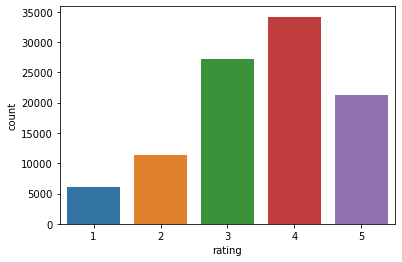

In [9]:
sns.countplot(ratings.rating)

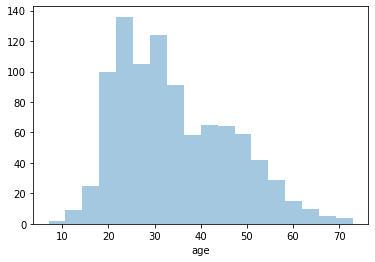

In [32]:
sns.distplot(users.age, kde=False)

Number of releases per year in dataset, 1922-1998


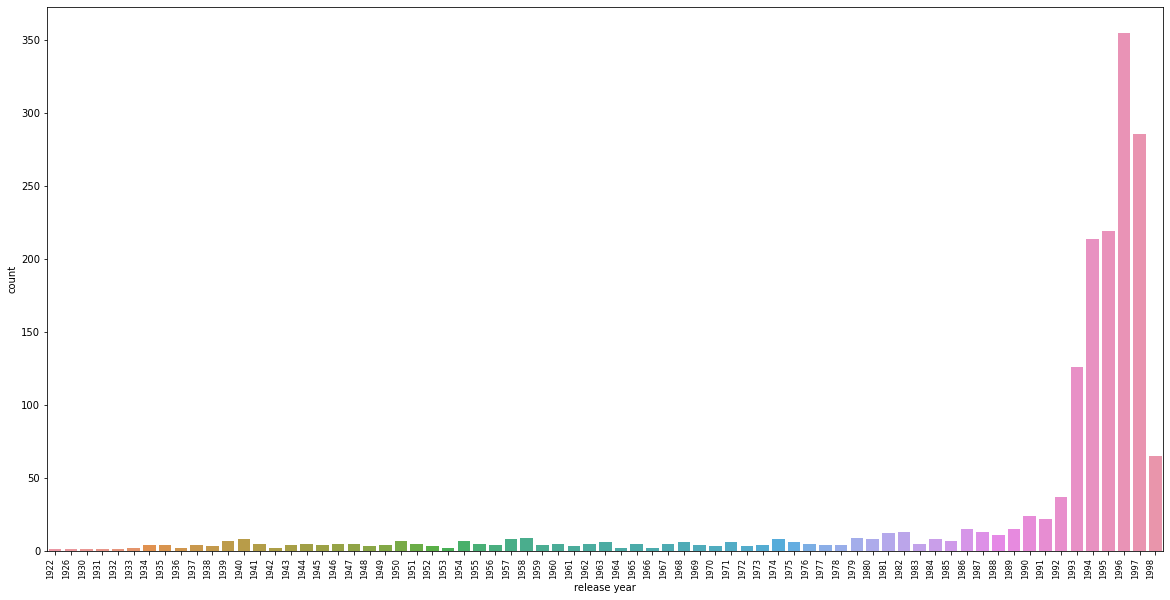

<Figure size 720x360 with 0 Axes>

In [33]:
movies['release year'] = pd.Series(movies['release date'].apply(lambda x: x.split('-')[2])) #Extract year from release date
f, ax = plt.subplots(figsize = (20, 10))
year = sns.countplot(movies['release year']) #plot count of releases per year
year.set_xticklabels(
    year.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

plt.figure(figsize=(10,5))
print("Number of releases per year in dataset, 1922-1998")

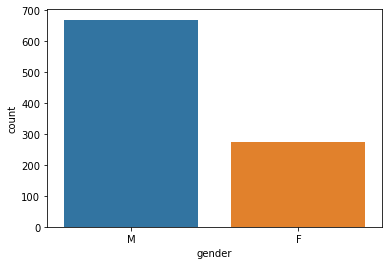

In [11]:
sns.countplot(users.gender)

<Figure size 720x360 with 0 Axes>

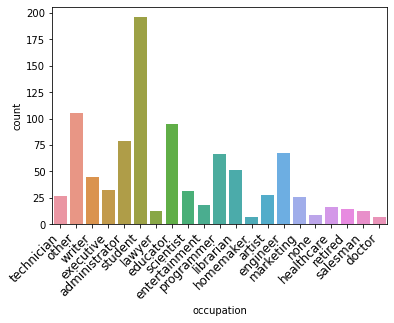

<Figure size 720x360 with 0 Axes>

In [31]:
user_jobs = sns.countplot(data=users, x="occupation") #plot counts of user occupations
user_jobs.set_xticklabels(
    user_jobs.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.figure(figsize=(10,5))


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [14]:
# only keep columns
genres = movies.drop(['movie id','movie title','release date','unknown','genre_count'], axis=1)
genres.set_index('release year', inplace=True) # use release year as index

# Calculate total number of releases per year
gpy = genres.groupby('release year').sum()
gpy['total'] = gpy.sum(axis=1)

# Calculate percentage of releases per year by genre
genre_percent = gpy.div(gpy['total'], axis= 0) * 100

This heatmap shows the popularity of genres by year:


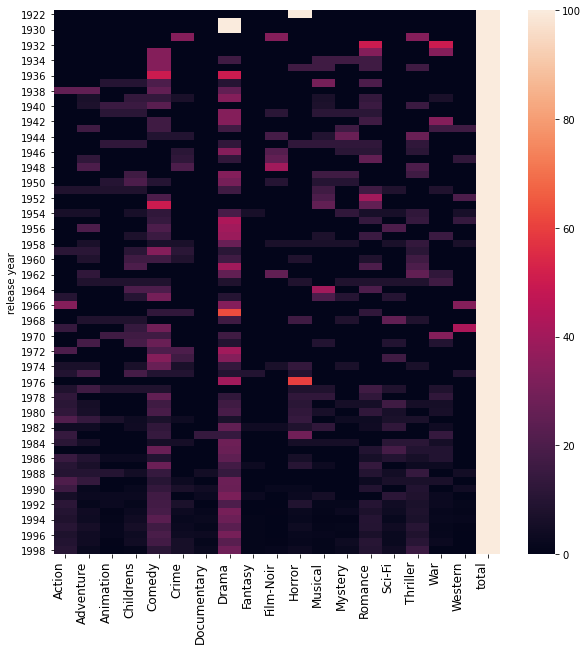

<Figure size 432x288 with 0 Axes>

In [26]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
genre_popularity = sns.heatmap(genre_percent) #plot the percentage of releases per genre for each year
genre_popularity.set_xticklabels(
    genre_popularity.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.figure()
print('This heatmap shows the popularity of genres by year:')

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [16]:
 # count the ratings for each movie
rcount = ratings.drop(['user id','timestamp'], axis=1).groupby('movie id').count()
rcount.columns = ['number of ratings']
 # get the mean rating of each movie
rmean = ratings.drop(['user id','timestamp'], axis=1).groupby('movie id').mean()
rmean.columns = ['average rating']

#create a dataframe with columns for Count and Mean
r = pd.merge(rcount, rmean, how='inner', on='movie id').sort_values(by='number of ratings', ascending=False)
r

,number of ratings,average rating
movie id,,
50,583,4.358491
258,509,3.803536
100,508,4.155512
181,507,4.007890
294,485,3.156701
...,...,...
1576,1,1.000000
1577,1,1.000000
1348,1,1.000000


In [48]:
# get a ratings dataframe with only rows containing ratings with a count higher than 100
r_over_100 = r.loc[r['number of ratings']>100]

# merge the new ratings dataframe with the movies dataframe, keeping relevant columns
r_over_100 = pd.merge(r_over_100, movies, how='inner',on='movie id').filter(items=['movie title','number of ratings','average rating','release year'])

# get a dataframe showing just the 25 movies with the highest average rating for those movies with more than 100 ratings
top_25 = r_over_100.sort_values(by='average rating', ascending=False)[0:25]
print('The table below shows the 25 top-rated movies in the dataset that have over 100 ratings.')
a = np.arange(1,26)
top_25.set_index(pd.Index(a))

The table below shows the 25 top-rated movies in the dataset that have over 100 ratings.


,movie title,number of ratings,average rating,release year
1,"Close Shave, A",112,4.491071,1996
2,Schindler's List,298,4.466443,1993
3,"Wrong Trousers, The",118,4.466102,1993
4,Casablanca,243,4.456790,1942
5,"Shawshank Redemption, The",283,4.445230,1994
6,Rear Window,209,4.387560,1954
7,"Usual Suspects, The",267,4.385768,1995
8,Star Wars,583,4.358491,1977
9,12 Angry Men,125,4.344000,1957
10,Citizen Kane,198,4.292929,1941


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [18]:
#merge datasets:
ru = pd.merge(ratings, users, how='outer', on='user id') #join Ratings table with Users table 
alldata = pd.merge(ru,movies, how='outer', on='movie id') #join Movies table with Ratings+Users table

In [19]:
#get the total number of reviews by each gender
gender_count = alldata.groupby('gender').count() 
gender_count['rating']

gender
F    25740
M    74260
Name: rating, dtype: int64

In [20]:
totalRatingsByFemales = 25740
totalRatingsByMales = 74260

# Separate dataframe into two split by gender
data_f = alldata[alldata['gender']!='M']
data_m = alldata[alldata['gender']!='F']

In [24]:
#Now gender distribution statements can be evaluated

#Do men watch more Drama than women? The data suggests men watch LESS Drama than women
print("Do men watch more Drama than women?\n")
print("In this dataset:")

#Calculate percentages 
drama_female_percent = (((data_f[data_f['Drama']>0].Drama.count()) / totalRatingsByFemales) * 100).round(2)
print("Drama represents {} percent of all genres of movies given ratings by women".format(drama_female_percent))

drama_male_percent = (((data_m[data_m['Drama']>0].Drama.count()) / totalRatingsByMales) * 100).round(2)
print("Drama represents {} percent of all genres of movies given ratings by men\n".format(drama_male_percent))

print("The data suggests men watch LESS Drama than women")

Do men watch more Drama than women?

In this dataset:
Drama represents 42.77 percent of all genres of movies given ratings by women
Drama represents 38.9 percent of all genres of movies given ratings by men

The data suggests men watch LESS Drama than women


In [22]:
#Do women watch more Sci-Fi than men? The data suggests women watch LESS Sci-Fi than men
print("Do women watch more Sci-Fi than women?\n")
print("In this dataset:")

#Calculate percentages 
scifi_female_percent = (((data_f[data_f['Sci-Fi']>0]['Sci-Fi'].count()) / totalRatingsByFemales) * 100).round(2)
print("Sci-Fi represents {} percent of all genres of movies given ratings by women".format(scifi_female_percent))

scifi_male_percent = (((data_m[data_m['Sci-Fi']>0]['Sci-Fi'].count()) / totalRatingsByMales) * 100).round(2)
print("Sci-Fi represents {} percent of all genres of movies given ratings by men\n".format(scifi_male_percent))

print("The data suggests women watch LESS Sci-Fi than men")

Do women watch more Sci-Fi than women?

In this dataset:
Sci-Fi represents 10.21 percent of all genres of movies given ratings by women
Sci-Fi represents 13.6 percent of all genres of movies given ratings by men

The data suggests women watch LESS Sci-Fi than men


In [23]:
#Do men watch more Romance than women? The data suggests men watch LESS Romance than women
print("Do men watch more Romance than women?\n")
print("In this dataset:")

#Calculate percentages 
romance_female_percent = (((data_f[data_f['Romance']>0].Romance.count()) / totalRatingsByFemales) * 100).round(2)
print("Romance represents {} percent of all genres of movies given ratings by women".format(romance_female_percent))

romance_male_percent = (((data_m[data_m['Romance']>0].Romance.count()) / totalRatingsByMales) * 100).round(2)
print("Romance represents {} percent of all genres of movies given ratings by men\n".format(romance_male_percent))

print("The data suggests men watch LESS Romance than women")

Do men watch more Romance than women?

In this dataset:
Romance represents 22.76 percent of all genres of movies given ratings by women
Romance represents 18.32 percent of all genres of movies given ratings by men

The data suggests men watch LESS Romance than women
